In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import pymc3 as pm

In [ ]:
N = 40
a = 2

with pm.Model() as model:
  theta = pm.Uniform('theta',lower=0,upper=1)
  obs = pm.Binomial('a',p=theta,n=N,observed=a)
  trace = pm.sample(5000,chains=2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  import sys
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [theta]


Sampling 2 chains for 1_000 tune and 5_000 draw iterations (2_000 + 10_000 draws total) took 6 seconds.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: The function `traceplot` from PyMC3 is just an alias for `plot_trace` from ArviZ. Please switch to `pymc3.plot_trace` or `arviz.plot_trace`.
  


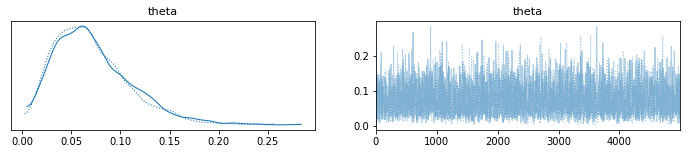

In [ ]:
with model:
  pm.traceplot(trace)

In [ ]:
with model:
  print(pm.summary(trace, hdi_prob=0.95))

        mean     sd  hdi_2.5%  hdi_97.5%  mcse_mean  mcse_sd  ess_bulk  \
theta  0.071  0.039      0.01      0.149      0.001      0.0    4349.0   

       ess_tail  r_hat  
theta    4509.0    1.0  


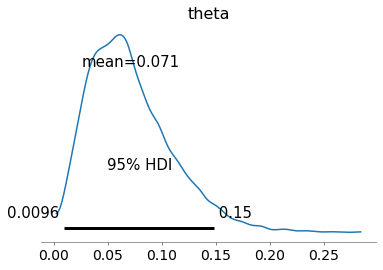

In [ ]:
with model:
  pm.plot_posterior(trace, hdi_prob=0.95)

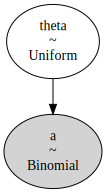

In [ ]:
pm.model_to_graphviz(model)